In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20
IMG_HEIGHT = 224
IMG_WIDTH = 224

FOLDER_PATH = '/content/drive/MyDrive/New_Masks_Dataset/'

CATEGORIES = ['Mask','Non Mask']

In [ ]:
test_data,train_data,valid_data = [],[],[]
test_label,train_label,valid_label = [],[],[]

for i in ['Test/','Train/','Validation/']:
  for category in CATEGORIES:
    path = os.path.join(FOLDER_PATH,i,category)
    for img in os.listdir(path):
      # process image for mobilenet

      img_path = os.path.join(path,img)
      img = tf.keras.preprocessing.image.load_img(img_path,target_size=(IMG_HEIGHT,IMG_WIDTH)) # for mobilenet size must be 224,224
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      img_array = np.expand_dims(img_array,0) # remove extra dim
      img = tf.keras.applications.mobilenet_v2.preprocess_input(img_array) # process image for mobilenet "make img in range -1 to 1"

      if i == 'Test/':
        test_data.append(img)
        test_label.append(CATEGORIES.index(category)) # label ecode

      elif i == 'Train/':
        train_data.append(img)
        train_label.append(CATEGORIES.index(category))

      elif i == 'Validation/':
        valid_data.append(img)
        valid_label.append(CATEGORIES.index(category))

In [ ]:
# convert label from label to one hot encode
train_label = tf.keras.utils.to_categorical(train_label,num_classes=2)
test_label = tf.keras.utils.to_categorical(test_label,num_classes=2)
valid_label = tf.keras.utils.to_categorical(valid_label,num_classes=2)

train_data = np.array(train_data, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
valid_data = np.array(valid_data, dtype=np.float32)

train_label = np.array(train_label)
test_label = np.array(test_label)
valid_label = np.array(valid_label)

In [ ]:
train_data = train_data.reshape(train_data.shape[0],IMG_HEIGHT,IMG_WIDTH,3)
test_data = test_data.reshape(test_data.shape[0],IMG_HEIGHT,IMG_WIDTH,3)
valid_data = valid_data.reshape(valid_data.shape[0],IMG_HEIGHT,IMG_WIDTH,3)
print(train_data.shape)
print(test_data.shape)
print(valid_data.shape)

(600, 224, 224, 3)
(101, 224, 224, 3)
(319, 224, 224, 3)


In [ ]:
# data augmentetion

aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT,IMG_WIDTH,3),include_top=False,weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(aug.flow(train_data,train_label,batch_size=BATCH_SIZE),validation_data=(valid_data,valid_label),epochs=EPOCHS)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.4832 - loss: 0.9375 - val_accuracy: 0.8433 - val_loss: 0.3822
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.8771 - loss: 0.3371 - val_accuracy: 0.9561 - val_loss: 0.1999
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9495 - loss: 0.1824 - val_accuracy: 0.9718 - val_loss: 0.1345
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9822 - loss: 0.1031 - val_accuracy: 0.9749 - val_loss: 0.1086
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9804 - loss: 0.0942 - val_accuracy: 0.9781 - val_loss: 0.0966
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.9939 - loss: 0.0706 - val_accuracy: 0.9781 - val_loss: 0.0826
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9942 - loss: 0.0526 - val_accuracy: 0.9781 - val_loss: 0.0771
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9923 - loss: 0.0492 - val_accuracy: 0.9812 - val_loss: 0.0706
Epo

In [ ]:
for layer in model.layers:
  print(layer,layer.trainable)

<Functional name=mobilenetv2_1.00_224, built=True> False
<GlobalAveragePooling2D name=global_average_pooling2d_1, built=True> True
<Flatten name=flatten_1, built=True> True
<Dense name=dense_2, built=True> True
<Dropout name=dropout_1, built=True> True
<Dense name=dense_3, built=True> True


In [ ]:
model.evaluate(test_data,test_label)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9746 - loss: 0.0301


[0.03627835959196091, 0.9702970385551453]

In [ ]:
predict = model.predict(test_data)
predict_idx = np.argmax(predict,axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


In [ ]:
test_label = np.argmax(test_label,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_label,predict_idx))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.98      0.96      0.97        51

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [ ]:
model.save('/content/drive/MyDrive/New_Masks_Dataset/mask_detector.keras', save_format='h5')

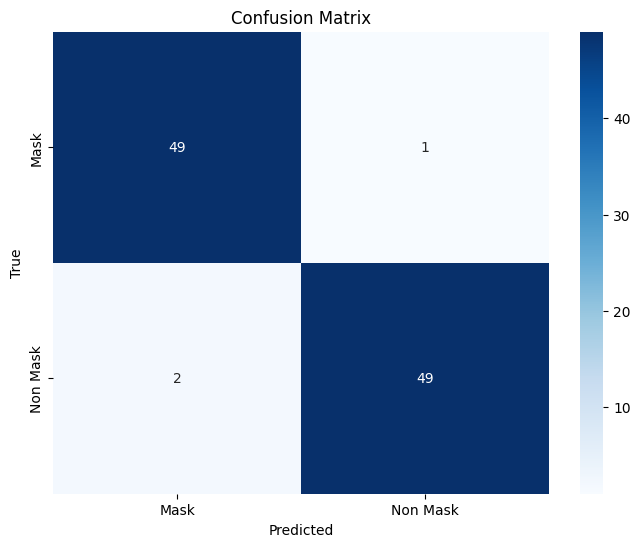

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_label, predict_idx)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

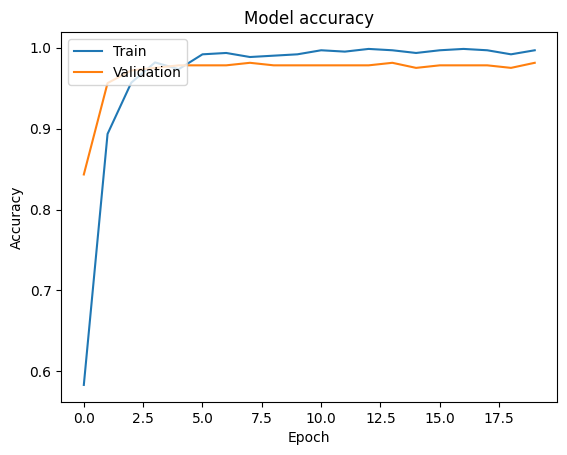

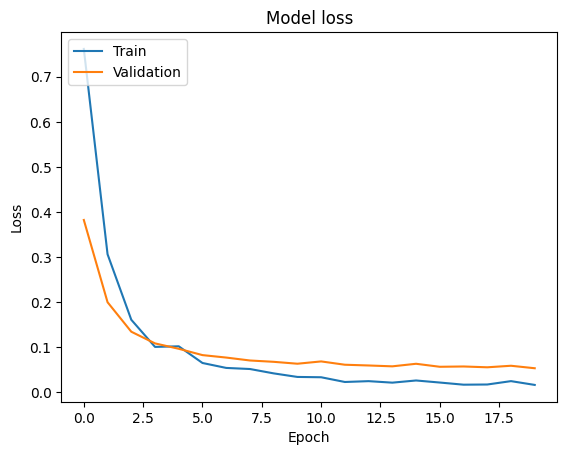

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()